In [41]:
import requests
import pandas as pd
import altair as alt
from datetime import datetime

In [46]:
base_url = "https://gamma-api.polymarket.com"

# Search for markets containing "pope" in the title or description
search_params = {
    "offset": 0,  # For pagination
    "active": False,  # Only active markets
    "closed": False,  # Exclude closed markets
    "order": "volume24hr",  # Order by 24hr volume
    "ascending": False  # Descending order
}

markets_url = f"{base_url}/events"
response = requests.get(markets_url, params=search_params)
response.raise_for_status()

all_markets = response.json()




In [47]:
for i in range(0,len(all_markets)):
  if 'Mayor'in all_markets[i]['description']:
    mayor_market = all_markets[i]
mayor_market
# all_markets[0]

{'id': '16111',
 'ticker': 'who-will-win-dem-nomination-for-nyc-mayor',
 'slug': 'who-will-win-dem-nomination-for-nyc-mayor',
 'title': 'Who will win Dem nomination for NYC Mayor?',
 'description': 'This is a market on predicting the winner of the Democratic nomination for New York City Mayor.',
 'resolutionSource': '',
 'startDate': '2024-12-30T15:49:49.006414Z',
 'creationDate': '2024-12-30T15:49:49.006405Z',
 'endDate': '2025-06-24T12:00:00Z',
 'image': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/who-will-win-dem-nomination-for-nyc-mayor-PN5445mq0qPS.png',
 'icon': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/who-will-win-dem-nomination-for-nyc-mayor-PN5445mq0qPS.png',
 'active': True,
 'closed': False,
 'archived': False,
 'new': False,
 'featured': True,
 'restricted': True,
 'liquidity': 3988201.6303,
 'volume': 26909582.319308,
 'openInterest': 0,
 'sortBy': 'price',
 'createdAt': '2024-12-29T18:54:00.212327Z',
 'updatedAt': '2025-06-14T20:48:24.502255Z',
 'co

In [52]:
for i, market in enumerate(mayor_market):
    description = mayor_market.get('description', 'No description')
    question = mayor_market.get('question', 'No question')
    clob_token_ids = mayor_market.get('clobTokenIds', [])



    print(f"\nMarket {i + 1}:")
    print(f"Question: {question}")
    print(f"Description: {description}")
    print(f"ClobTokenIds: {clob_token_ids}")
    print("-" * 40)

KeyError: 0

In [37]:
# 1. Trump wins 2024 election
base_url = "https://clob.polymarket.com/prices-history"
token_id =  "33064224357523449786613480102704635026181428303479305990935387590344871823925"
interval = "max"  # Options: 1m, 1w, 1d, 6h, 1h, max



#####################################################
fidelity = 10 # in minutes (e.g., 5-minute resolution)
#####################################################

In [39]:

# 2. Make the request
params = {
    "market": token_id,
    "interval": interval,
    "fidelity": fidelity
}
response = requests.get(base_url, params=params)
response.raise_for_status()  # will raise an error for bad requests

print("Request URL:", response.url)
print(response.json())
# 3. Parse the response
data = response.json()["history"]

# 4. Convert to DataFrame
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['t'], unit='s')
df['price'] = df['p']
df = df[['timestamp', 'price']].sort_values('timestamp')

# 5. Preview
print(df.head())



Request URL: https://clob.polymarket.com/prices-history?market=33064224357523449786613480102704635026181428303479305990935387590344871823925&interval=max&fidelity=10
{'history': [{'t': 1747255207, 'p': 0.895}, {'t': 1747255807, 'p': 0.895}, {'t': 1747256406, 'p': 0.895}, {'t': 1747257007, 'p': 0.895}, {'t': 1747257607, 'p': 0.895}, {'t': 1747258207, 'p': 0.895}, {'t': 1747258806, 'p': 0.895}, {'t': 1747259407, 'p': 0.895}, {'t': 1747260006, 'p': 0.895}, {'t': 1747260607, 'p': 0.895}, {'t': 1747261207, 'p': 0.895}, {'t': 1747261807, 'p': 0.895}, {'t': 1747262407, 'p': 0.895}, {'t': 1747263006, 'p': 0.895}, {'t': 1747263606, 'p': 0.895}, {'t': 1747264206, 'p': 0.895}, {'t': 1747264806, 'p': 0.895}, {'t': 1747265407, 'p': 0.895}, {'t': 1747266007, 'p': 0.895}, {'t': 1747266607, 'p': 0.895}, {'t': 1747267207, 'p': 0.895}, {'t': 1747267807, 'p': 0.895}, {'t': 1747268407, 'p': 0.895}, {'t': 1747269007, 'p': 0.895}, {'t': 1747269606, 'p': 0.895}, {'t': 1747270207, 'p': 0.895}, {'t': 174727080

In [45]:
alt.Chart(df).mark_line().encode(
    x='timestamp',
    y='price'
).properties(title="Andrew Cuomo's Probability of Winning the NYC Mayoral Election")


alt.Chart(...)

In [9]:

#####################################################
fidelity = 60*24 # in minutes (e.g., 5-minute resolution)
#####################################################

# 2. Make the request
params = {
    "market": token_id,
    "interval": interval,
    "fidelity": fidelity
}
response = requests.get(base_url, params=params)
response.raise_for_status()  # will raise an error for bad requests

print("Request URL:", response.url)
print(response.json())
# 3. Parse the response
data = response.json()["history"]

# 4. Convert to DataFrame
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['t'], unit='s')
df['price'] = df['p']
df = df[['timestamp', 'price']].sort_values('timestamp')

# 5. Preview
print(df.head())

Request URL: https://clob.polymarket.com/prices-history?market=21742633143463906290569050155826241533067272736897614950488156847949938836455&interval=max&fidelity=1440
{'history': [{'t': 1704412803, 'p': 0.5}, {'t': 1704499202, 'p': 0.405}, {'t': 1704585602, 'p': 0.405}, {'t': 1704672002, 'p': 0.475}, {'t': 1704758403, 'p': 0.465}, {'t': 1704844803, 'p': 0.455}, {'t': 1704931203, 'p': 0.465}, {'t': 1705017603, 'p': 0.475}, {'t': 1705104002, 'p': 0.485}, {'t': 1705190402, 'p': 0.485}, {'t': 1705276803, 'p': 0.475}, {'t': 1705363202, 'p': 0.475}, {'t': 1705449603, 'p': 0.485}, {'t': 1705536002, 'p': 0.485}, {'t': 1705622402, 'p': 0.485}, {'t': 1705708803, 'p': 0.485}, {'t': 1705795202, 'p': 0.485}, {'t': 1705881602, 'p': 0.485}, {'t': 1705968003, 'p': 0.545}, {'t': 1706054402, 'p': 0.545}, {'t': 1706140802, 'p': 0.545}, {'t': 1706227202, 'p': 0.545}, {'t': 1706313602, 'p': 0.545}, {'t': 1706400002, 'p': 0.545}, {'t': 1706486402, 'p': 0.545}, {'t': 1706572802, 'p': 0.545}, {'t': 170665920

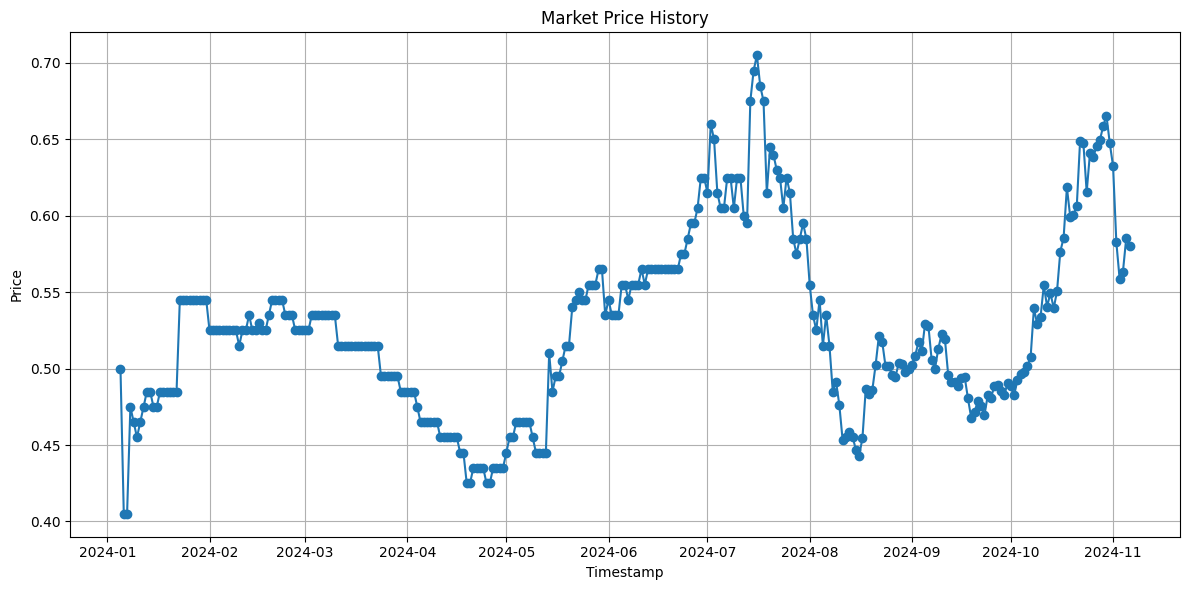

In [ ]:
import matplotlib.pyplot as plt

# Plot the price history
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], marker='o', linestyle='-')

# Labels and title
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Market Price History')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# 1.
base_url = "https://clob.polymarket.com/prices-history"
token_id =  85622611354739768668834047315949236654845233916829403504276038165642000149964
interval = "max"  # Options: 1m, 1w, 1d, 6h, 1h, max



#####################################################
fidelity = 10 # in minutes (e.g., 5-minute resolution)
#####################################################

In [ ]:

# 2. Make the request
params = {
    "market": token_id,
    "interval": interval,
    "fidelity": fidelity
}
response = requests.get(base_url, params=params)
response.raise_for_status()  # will raise an error for bad requests

print("Request URL:", response.url)
print(response.json())
# 3. Parse the response
data = response.json()["history"]

# 4. Convert to DataFrame
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['t'], unit='s')
df['price'] = df['p']
df = df[['timestamp', 'price']].sort_values('timestamp')

# 5. Preview
print(df.head())

Request URL: https://clob.polymarket.com/prices-history?market=85622611354739768668834047315949236654845233916829403504276038165642000149964&interval=max&fidelity=10
{'history': [{'t': 1748938806, 'p': 0.5}, {'t': 1748939406, 'p': 0.5}, {'t': 1748940006, 'p': 0.5}, {'t': 1748940605, 'p': 0.5}, {'t': 1748941206, 'p': 0.5}, {'t': 1748941806, 'p': 0.5}, {'t': 1748942406, 'p': 0.5}, {'t': 1748943007, 'p': 0.5}, {'t': 1748943605, 'p': 0.5}, {'t': 1748944206, 'p': 0.5}, {'t': 1748944806, 'p': 0.5}, {'t': 1748945405, 'p': 0.5}, {'t': 1748946006, 'p': 0.5}, {'t': 1748946606, 'p': 0.5}, {'t': 1748947207, 'p': 0.5}, {'t': 1748947806, 'p': 0.5}, {'t': 1748948406, 'p': 0.5}, {'t': 1748949006, 'p': 0.5}, {'t': 1748949606, 'p': 0.5}, {'t': 1748950207, 'p': 0.5}, {'t': 1748950805, 'p': 0.5}, {'t': 1748951406, 'p': 0.5}, {'t': 1748952006, 'p': 0.5}, {'t': 1748952606, 'p': 0.5}, {'t': 1748953205, 'p': 0.5}, {'t': 1748953806, 'p': 0.5}, {'t': 1748954406, 'p': 0.5}, {'t': 1748955006, 'p': 0.5}, {'t': 174